### 넘파이로 구현한 간단한 RNN

In [1]:
import numpy as np

In [3]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, axis = 0)


In [4]:
final_output_sequence

array([[0.99999997, 0.99999998, 0.99999999, ..., 0.99999996, 0.99999986,
        0.9999999 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩 ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩 ...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6285 - acc: 0.6269 - val_loss: 0.5403 - val_acc: 0.7214
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4007 - acc: 0.8275 - val_loss: 0.4128 - val_acc: 0.8178
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2869 - acc: 0.8862 - val_loss: 0.3611 - val_acc: 0.8442
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2042 - acc: 0.9238 - val_loss: 0.3836 - val_acc: 0.8484
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1353 - acc: 0.9514 - val_loss: 0.3922 - val_acc: 0.8618
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0880 - acc: 0.9717 - val_loss: 0.4106 - val_acc: 0.8502
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0560 - acc: 0.9831 - val_loss: 0.6312 - val_acc:

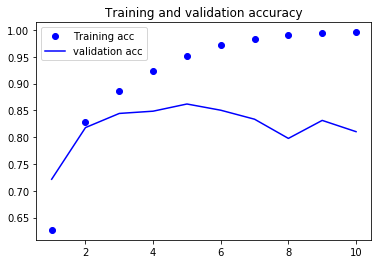

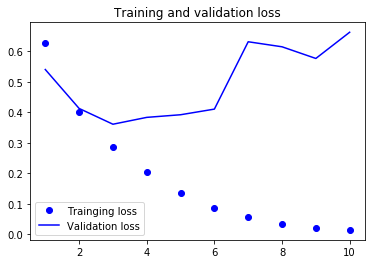

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainging loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 4608/20000 [=====>........................] - ETA: 1:01 - loss: 0.6777 - acc: 0.6092

KeyboardInterrupt: 